## Rule
- Open everything. No communication regarding exam.
- You will be graded out of 450.

In [39]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')

## Problem 1: (100)
Some Theory. Make the correct statement **bold**

1. When we found that gradient descent does not converge. We should (increase/**decrease**) the learning rate.

2. Gradient descent (guarantee/ **does not guarantee**) global minimum.

3. Newton's Methods (guarantee/**does not guarantee**) convergence.

4. Monte Carlo integration convergence (does/**does not**) depend on the number of dimension.

5. Hill Climbing method (guarantee/ **does not guarantee**) global minimum.

## Problem 2:
    
### 2.1 (50)
Find solutions to the following system of equation using Newton's method.
$$
x + \sin(y) = 1 \\
y^2 + \sin(x) = 2
$$

Find both solutions. There are two.


In [40]:
def u(x,y):
    return x + np.sin(y) - 1

def v(x,y):
    return y**2 + np.sin(x) - 2

def derivUx(x,y):
    return 1

def derivUy(x,y):
    return np.cos(y)

def derivVx(x,y):
    return np.cos(x)

def derivVy(x,y):
    return 2*y

Text(0.5,0.92,'v(x,y)')

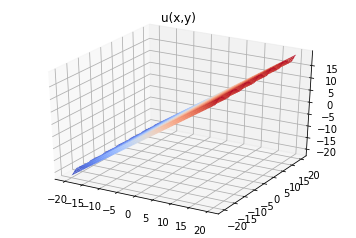

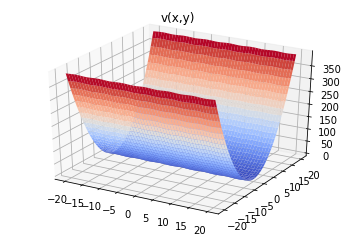

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) 
        vz[iy,ix] = v(xx,yy)    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

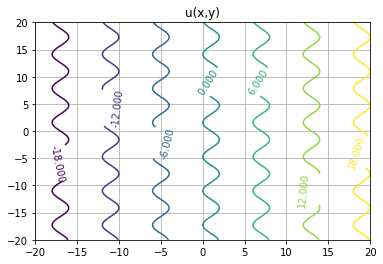

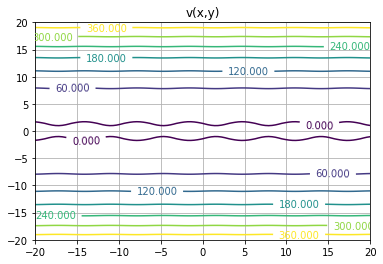

In [42]:
nx = 100
ny = 100
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)

uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy)
        vz[iy,ix] = v(xx,yy)
 

ucs = plt.contour(x, y, uz)#, colors=('b','r','g'))
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('u(x,y)')

plt.figure()
vcs = plt.contour(x, y, vz)#, colors=('b','r','g'))
plt.clabel(vcs, inline=1, fontsize=10,)
plt.title('v(x,y)')
plt.grid()

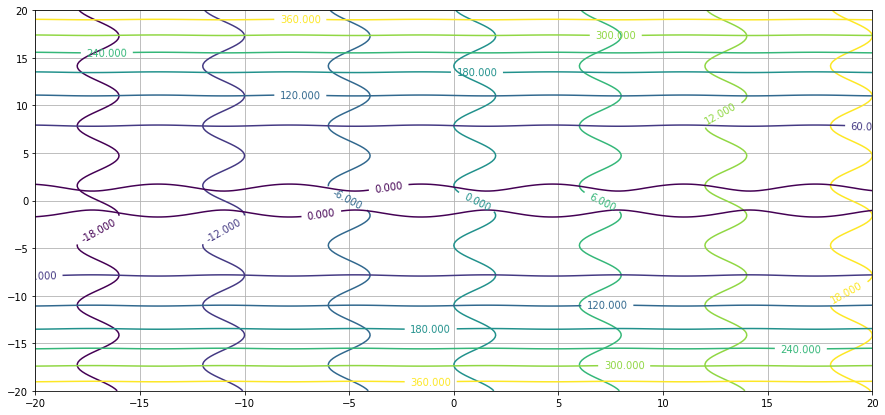

In [43]:
plt.figure(figsize=(15,7))

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)

uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy)
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz)#, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz)#, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()


# two solutions
# one at about (0,1) and the other one at about (2,-1)

In [44]:
x1 = 0
y1 = 1
for i in range(10):
    mat1 = [-(u(x1,y1)),-(v(x1,y1))]
    mat2 = [[derivUx(x1,y1),derivUy(x1,y1)],
            [derivVx(x1,y1),derivVy(x1,y1)]]
    deltX,deltY = np.linalg.solve(mat2,mat1)
    x1 = x1 + deltX
    y1 = y1 + deltY
#     print(x,y)
print(x1,y1)

#Verify 

print(u(x1,y1))
print(v(x1,y1))

0.012960145441816397 1.4096241404588696
0.0
0.0


In [45]:
x2 = 2
y2 = -1
for i in range(10):
    mat1 = [-(u(x2,y2)),-(v(x2,y2))]
    mat2 = [[derivUx(x2,y2),derivUy(x2,y2)],
            [derivVx(x2,y2),derivVy(x2,y2)]]
    deltX,deltY = np.linalg.solve(mat2,mat1)
    x2 = x2 + deltX
    y2 = y2 + deltY
#     print(x,y)
print(x2,y2)

#Verify 

print(u(x2,y2))
print(v(x2,y2))

1.8518061190601822 -1.0194234220493739
0.0
0.0


### 2.2(50)
    
$$
\int_C \sin(x^2)\cos(y^2) \;\text{d}A
$$

where C is the region defined by **circle of radius 1 centered at $x=1, y=2$**

$$
\int\int_C \sin(x^2)\cos(y^2) \;\text{d}x\;\text{d}y
$$

In [46]:
def f(x,y):
    if (x-1)**2 + (y-2)**2 <= 1: 
        return np.sin(x**2)*np.cos(y**2)
    else:
        return 0

s = 0 
n = 1000000
for i in range(n):
    x = np.random.rand()*2
    y = np.random.rand()*2 + 1
    s += f(x,y)
    
total_area = 2**2 # area of the box that encloses the circle
print(s * total_area / n)

-0.14481600548488607


## Problem 3

We believe that the data be written as

$$y = A \exp(\frac{-(x-\mu)^2}{\sigma^2}) + Bx + C$$

Find $A, B, C, \mu$ and $\sigma$ which gives you the best fit.

Be careful with starting parameter.

In [47]:
p3_xs = np.array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])
p3_ys = np.array([-3.68772107, -3.67941398, -3.1462531 , -2.95653641, -3.10147411,
       -2.91346186, -2.88410695, -2.71646963, -2.49963456, -2.50369043,
       -2.25090053, -2.56505422, -2.13260531, -2.27992346, -2.14562936,
       -2.12596261, -1.35278898, -1.71622788, -1.57028003, -1.65361591,
       -0.9234219 , -0.88144526, -0.77234316, -1.03093821, -0.54947754,
        0.50733427, -0.00471332,  0.4976489 ,  1.51112504,  1.7035049 ,
        2.06354253,  3.08385693,  2.51778002,  2.63658336,  3.18624835,
        2.54578237,  2.33866124,  2.31325498,  2.29221991,  1.59749764,
        1.83940422,  1.2050842 ,  1.20128484,  1.50524725,  1.34539803,
        0.98641652,  1.24856525,  1.15139335,  1.47977891,  1.4729804 ])

A = 2.9796450486015527
B = 0.4952967768982095
C = -0.9711326004128252
mu = 1.6614254627795222
sigma = 1.4202697575072962


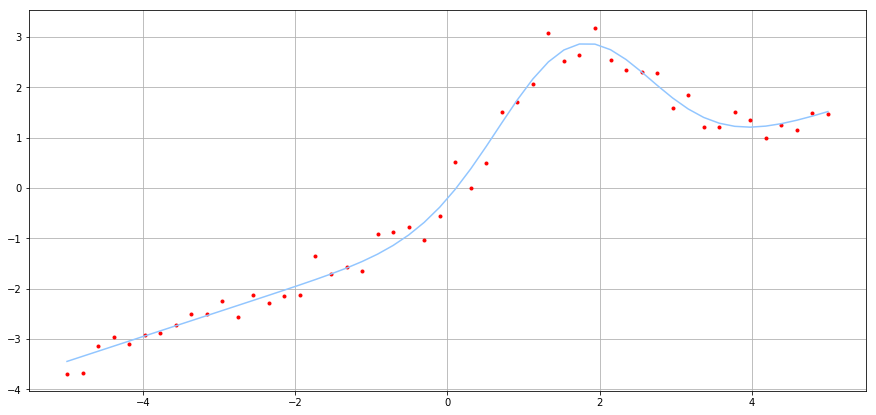

In [48]:
from scipy.optimize import minimize
plt.figure(figsize=(15,7))
plt.grid()

def cost(w):
    A,B,C,mu,sigma = w
    return np.sum(((A*(np.e**((-(p3_xs-mu)**2/sigma**2))) + B*p3_xs + C)-p3_ys)**2)

res = minimize(cost,[1.,1.,1.,1.,1.])
A,B,C,mu,sigma = res.x
# print (res.x)

plt.plot(p3_xs,p3_ys,'r.')
plt.plot(p3_xs,A*(np.e**((-(p3_xs-mu)**2/sigma**2))) + B*p3_xs + C)

print('A =',res.x[0])
print('B =',res.x[1])
print('C =',res.x[2])
print('mu =',res.x[3])
print('sigma =',res.x[4])

## Problem 4: Simulation (100)

Consider a game where the player toss 5 dices at a time. Each turn his score is the maximum of the 5 dices. For example, if the 5 dices are [3,5,2,1,5] then his score is 5.

1) Find the probabality that his score is below or equal 3.

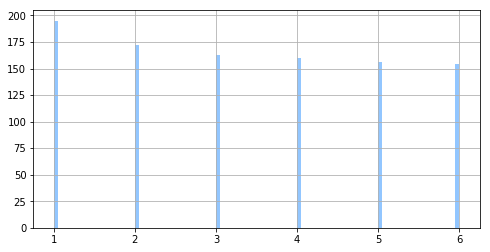

In [49]:
plt.figure(figsize=(8,4))
plt.grid()
def gen_dice():
    rand = np.random.rand()
    if rand < 1/6:
        return 1
    elif rand < 2/6:
        return 2
    elif rand < 1/2:
        return 3
    elif rand < 2/3:
        return 4
    elif rand < 5/6:
        return 5
    else:
        return 6
    
dices = [gen_dice() for i in range(1000)]
plt.hist(dices,bins=100);

In [50]:
#Assuming dice is fair and using randomly generated number 

def prob(n):
    result = 0
    for num in range(n):
        dice_val = [gen_dice() for i in range(5)]
        score = max(dice_val)
        if score <= 3:
            result += 1
    return result/n

prob(100000)
# print([prob(100000) for i in range(50)])
        

0.03122

In [51]:
# Make all possible outcomes and compare the prob with the value got by generating random dice
# Turns out pretty close

def make_dice_for_real():
    lst = [0,0,0,0,0]
    count3 = 0
    countLst = 0
    for i in range(1,7):
        for j in range(1,7):
            for k in range(1,7):
                for l in range(1,7):
                    for m in range(1,7):
                        lst = [i,j,k,l,m]
                        countLst += 1
                        if max(lst) <= 3:
                            count3 += 1
    return count3/countLst

print(make_dice_for_real())

0.03125


2) What is the expected value of his score?

In [52]:
def max_five_dices():
    a = gen_dice()
    b = gen_dice()
    c = gen_dice()
    d = gen_dice()
    e = gen_dice()
    score = max([a,b,c,d,e])
    return score 

np.average([max_five_dices() for i in range(1000)])
 

5.414

### Problem 5: Hill Climbing(100)

Food delivery service is now quite popular given social distancing adopted by many countries. Let's us try to solve lunch time problem for a Juni's Kitchen: a startup company delivering lunch to people.

Juni's Kitchen has a **centralized** kitchen where they cook all the food at **(0,0)**. The delivery motocycles need to pick up the food from this centralized location and travel to each customer house to deliver lunch.

**The company only have 6 motorcycle**. It is very economical that each motorcycle pick up **all** the lunch that each motorcycle needs to deliver. Then deliver them. This way the motorcycle doesn't have to waste gas coming back to the central location to pick up food.

Consider a lunch day where there are **60 deliveries to be made**. The job is spread out evenly so that each motorcycle needs to make **10 deliveries each**. The location of each delivery is given(xs, ys) list in the list below.

Since Juni company is a startup. They try very best to save on money. The cost of delivery is proportional to the total distance$\sqrt{\Delta x^2 + \Delta y^2}$ the motorcycles traveling
    
    - from the kitchen center to the first location
    - from delivery location to delivery location
    - from the final delivery location back to the kitchen center
    
Find and plot a path for the 6 motorcycles that save Juni's money. **I'm not looking for the global minimum just a decent path is enough**. (I accept anything below 300)

**Note**

If you have nothing better to do, in the real world application, spreading out the job to 10delivery/motorcycle is a not a very good constraint. The better contsraint would be to limit the delivery for each motorcycle to 20 delivery max/motorcycle(each motorcycle will get different amount of job)

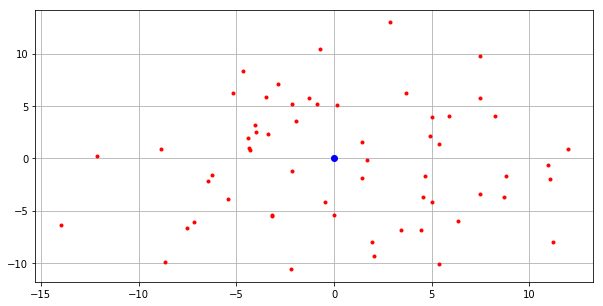

In [53]:
np.random.seed(123)
xs = np.random.randn(60)*5
ys = np.random.randn(60)*5
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(xs, ys, '.r') # These people are hungry
plt.plot(0,0, 'ob') # The kitchen center
# print(xs)

In [54]:
def initial_state(): 
    # makes a 2D array, with 6 subarrays, each one consisting of 10 points 
    lst = []
    subLst = []
    for i in range(10):
        subLst.append((xs[i],ys[i]))
    lst.append(subLst)
    subLst = []
    for i in range(10,20):
        subLst.append((xs[i],ys[i]))
    lst.append(subLst)
    subLst = []
    for i in range(20,30):
        subLst.append((xs[i],ys[i]))
    lst.append(subLst)
    subLst = []
    for i in range(30,40):
        subLst.append((xs[i],ys[i]))
    lst.append(subLst)
    subLst = []
    for i in range(40,50):
        subLst.append((xs[i],ys[i]))
    lst.append(subLst)
    subLst = []
    for i in range(50,60):
        subLst.append((xs[i],ys[i]))
    lst.append(subLst)
    subLst = []
    return lst
# print(initial_state()[0])
# print(initial_state()[1])
# print(initial_state()[2])
# print(initial_state()[3])
# print(initial_state()[4])
# print(initial_state()[5])



In [55]:
# Totally guessing this pai loey jaaaaaaa


def cost(journey_10): 
    # this is the evaluate function 
    
    # take in a subarray (those ones with just 10 points) from the state and calculate the cost of 
    # travelling from those 10 points - from origin and back
    
    price = 0
    for i in range(9):
        # the cost of travelling all ten points 
        price += np.sqrt((journey_10[i][0]-journey_10[i+1][0])**2 + (journey_10[i][1]-journey_10[i+1][1])**2)
        
    price += np.sqrt((journey_10[i][0])**2 + (journey_10[i][1])**2) # for going from the origin to the first point
    price += np.sqrt((journey_10[-1][0])**2 + (journey_10[-1][1])**2) # for coming back to the origin
    return price
        
def perturb(state): 
    # this function will take a random 2 points, each one from one of the 6 subsrrays, and swap them
    new_state = state#.copy
    x , y = np.random.randint(0,6,2) # to choose one of the six subarrays
    a , b = np.random.randint(0,10,2) # to choose one of the points from that subarray
    
    #swap
    to_change = new_state[x][a]
    from_change = new_state[y][b]
    new_state[x][a] = from_change
    new_state[y][b] = to_change
    
    return new_state

def find_path(n):
    state = initial_state()
    best_score = [cost(state[i]) for i in range(len(state))] # find the cost of travelling all the 10 points of each of the 
                                                             # 6 subarrays
    for i in range(n):
        new_state = perturb(state)
        new_score = [cost(new_state[i]) for i in range(len(new_state))] # find cost of travelling after perturb
        if sum(new_score) < sum(best_score):
            state = new_state
            best_score = new_score
#             for j in state:
#                 for point in j:
#                     print('mehhhhhhhh')
#                     plt.scatter(point[0],point[1])
    return  best_score,state
    

Score of travelling each of the 6 paths are  [81.2265331370032, 92.67173893793014, 77.5559157692988, 103.89469492532093, 91.27627692200902, 71.69275486688889]


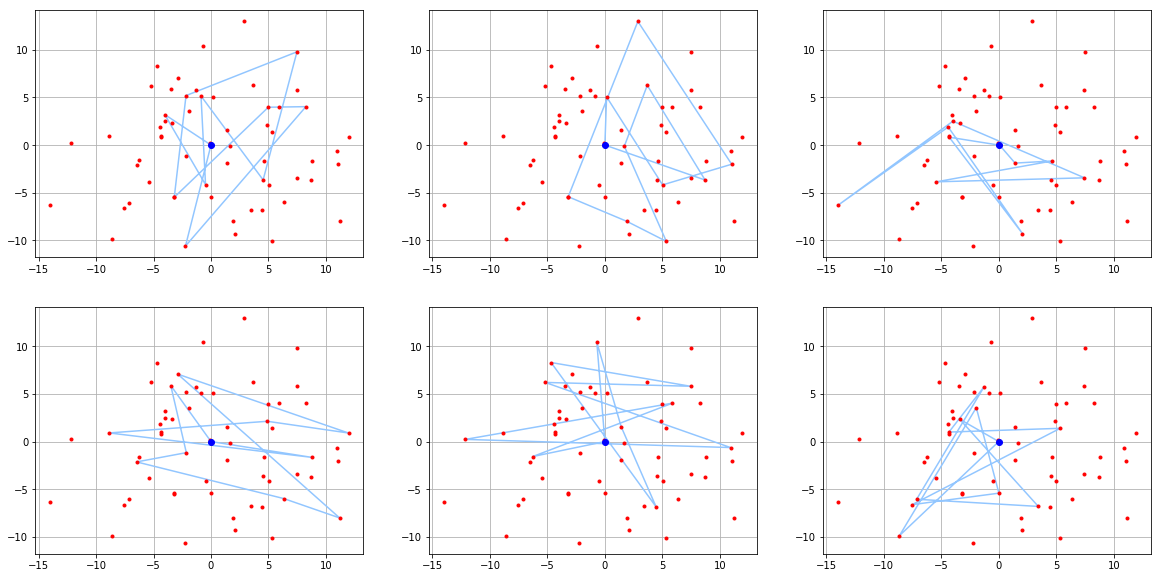

In [56]:
# plt.figure(figsize=(20,10))

f, ((a,b,c),(d,e,f)) = plt.subplots(2,3,figsize=(20,10))

a.grid()
b.grid()
c.grid()
d.grid()
e.grid()
f.grid()

ans = find_path(100)[1]
lstX = []
lstY = []
X = []
Y = []
for array_of_points in ans:
    lstX.append(0)
    lstY.append(0)
    for points in array_of_points:
        lstX.append(points[0])
        lstY.append(points[1])
    lstX.append(0)
    lstY.append(0)
    X.append(lstX)
    Y.append(lstY)
    lstX = []
    lstY = []
    
# print(X,Y)
a.plot(X[0],Y[0])
b.plot(X[1],Y[1])
c.plot(X[2],Y[2])
d.plot(X[3],Y[3])
e.plot(X[4],Y[4])
f.plot(X[5],Y[5])

a.plot(xs,ys,'.r')
a.plot(0,0,'ob')
b.plot(xs,ys,'.r')
b.plot(0,0,'ob')
c.plot(xs,ys,'.r')
c.plot(0,0,'ob')
d.plot(xs,ys,'.r')
d.plot(0,0,'ob')
e.plot(xs,ys,'.r')
e.plot(0,0,'ob')
f.plot(xs,ys,'.r')
f.plot(0,0,'ob')


print('Score of travelling each of the 6 paths are ',find_path(10000)[0])


# Why tf are the plots looking so messyyyyyyyyyyyyyyyyyy T.T
# But at least it passes through all the points tho 
# And the scores are less than 300 - but hell yeah pretty sure they are wrong - MEH..H..H...h...h....h !!! 
# Felt like there's a logic error in the score evaluation function 

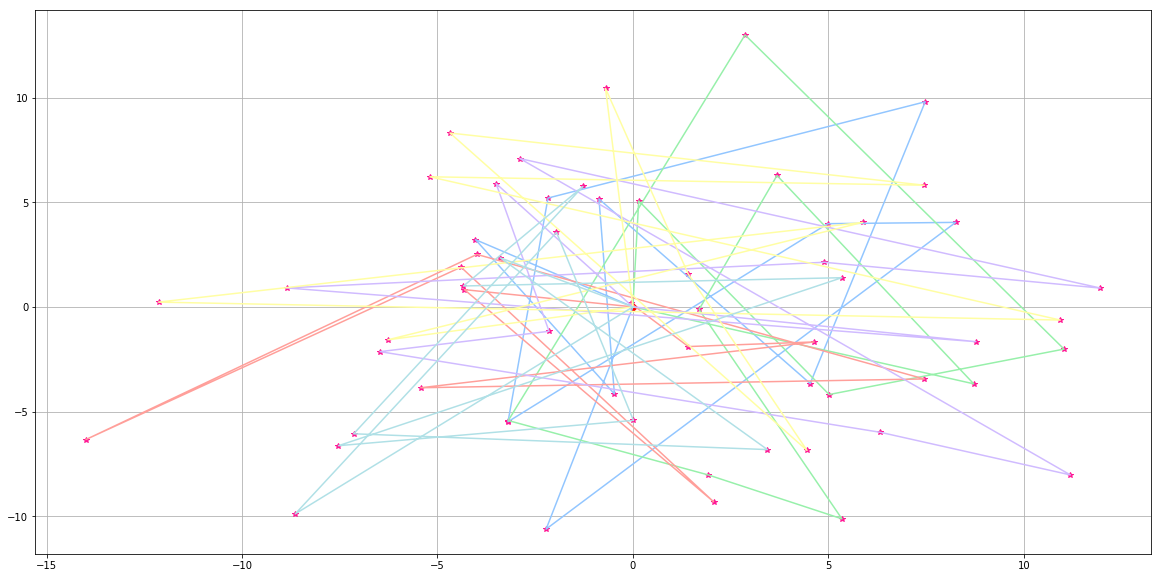

In [57]:
# I don't even wanna look at the plot below myself 
# AJ I'm sorry :) 

plt.figure(figsize=(20,10))
plt.plot(xs,ys,'*',color='deeppink')
plt.plot(0,0,'D',color='r')

plt.grid()
for i in range(len(X)):
    plt.plot(X[i],Y[i])